In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats

In [2]:
df = pd.read_csv("NEW-DATA-3.T15.txt", sep=' ')


In [3]:
df

,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,18/04/2012,00:00,20.2000,19.8000,13.0000,207.840,206.560,31.5800,30.1600,11.7200,...,0.00,0.00,0.000,-3.12000,0,0,0,16.0700,39.0800,3.0
1,18/04/2012,00:15,20.1593,19.7600,13.0000,207.499,206.101,31.6240,30.0613,11.5240,...,0.00,0.00,0.000,-2.80800,0,0,0,16.0400,38.9680,3.0
2,18/04/2012,00:30,20.0740,19.6580,13.0000,207.360,206.805,31.6507,30.1773,11.6220,...,0.00,0.00,0.000,-2.96400,0,0,0,16.0160,38.9467,3.0
3,18/04/2012,00:45,19.9773,19.5833,13.0000,207.445,206.325,31.6987,30.2560,11.7847,...,0.00,0.00,0.000,-3.02933,0,0,0,15.9427,39.0760,3.0
4,18/04/2012,01:00,19.8933,19.5000,13.0000,207.840,205.952,31.7707,30.3840,11.5887,...,0.00,0.00,0.000,-2.88600,0,0,0,15.8627,40.0413,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,11/04/2012,05:30,21.1520,20.8187,13.0000,190.539,192.181,41.3120,41.6880,11.4427,...,0.00,0.00,0.000,-3.43400,0,0,0,16.6180,49.2960,3.0
4133,11/04/2012,05:45,21.0413,20.7053,12.1333,190.421,193.067,41.3173,41.7200,11.6867,...,465.92,2716.67,523.264,3.85200,0,0,0,16.4013,50.0373,3.0
4134,11/04/2012,06:00,20.9347,20.5827,12.0000,190.432,193.653,41.3333,41.7573,19.5387,...,3454.98,16203.80,3347.460,26.83000,0,0,0,16.2607,50.0587,3.0
4135,11/04/2012,06:15,20.8560,20.5200,12.0000,191.531,193.387,41.3093,41.8107,20.9853,...,6795.26,38303.10,7110.660,66.94930,0,0,0,16.2367,49.8400,3.0


In [4]:
df=df.rename(columns={"3:Temperature_Comedor_Sensor":"3:Temperature_Dinning_Sensor",
                   "4:Temperature_Habitacion_Sensor": "4:Temperature_Room_Sensor",
                  "6:CO2_Comedor_Sensor": "6:CO2_Dinning_Sensor",
                  "7:CO2_Habitacion_Sensor":"7:CO2_Room_Sensor",
                  "8:Humedad_Comedor_Sensor":"8:Humid_Dinning_Sensor",
                  "9:Humedad_Habitacion_Sensor":"9:Humid_Room_Sensor",
                  "10:Lighting_Comedor_Sensor":"10:Lighting_Dinning_Sensor",
                  "11:Lighting_Habitacion_Sensor":"11:Lighting_Room_Sensor",
                  "13:Meteo_Exterior_Crepusculo":"13:Sun_Dusk",
                  "14:Meteo_Exterior_Viento":"14:Win",
                  "15:Meteo_Exterior_Sol_Oest":"15:Sunlight_West",
                  "16:Meteo_Exterior_Sol_Est":"16:Sunlight_East",
                   "17:Meteo_Exterior_Sol_Sud":"17:Sunlight_South",
                   "18:Meteo_Exterior_Piranometro":"18:Sun_Irradiance",
                "23:Humedad_Exterior_Sensor":"23:Humid_Exterior_Sensor"})

Missing data statistics
1:Date                            0
2:Time                            0
3:Temperature_Dinning_Sensor      0
4:Temperature_Room_Sensor         0
5:Weather_Temperature             0
6:CO2_Dinning_Sensor              0
7:CO2_Room_Sensor                 0
8:Humid_Dinning_Sensor            0
9:Humid_Room_Sensor               0
10:Lighting_Dinning_Sensor        0
11:Lighting_Room_Sensor           0
12:Precipitacion                  0
13:Sun_Dusk                       0
14:Win                            0
15:Sunlight_West                  0
16:Sunlight_East                  0
17:Sunlight_South                 0
18:Sun_Irradiance                 0
19:Exterior_Entalpic_1            0
20:Exterior_Entalpic_2            0
21:Exterior_Entalpic_turbo        0
22:Temperature_Exterior_Sensor    0
23:Humid_Exterior_Sensor          0
24:Day_Of_Week                    0
dtype: int64


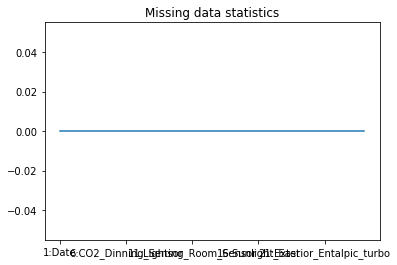

In [5]:
#checking if we have any missing value
print("Missing data statistics")
print (df.isnull().sum())
x= df.isnull().sum()
plt.title("Missing data statistics")
x.plot(kind='line')

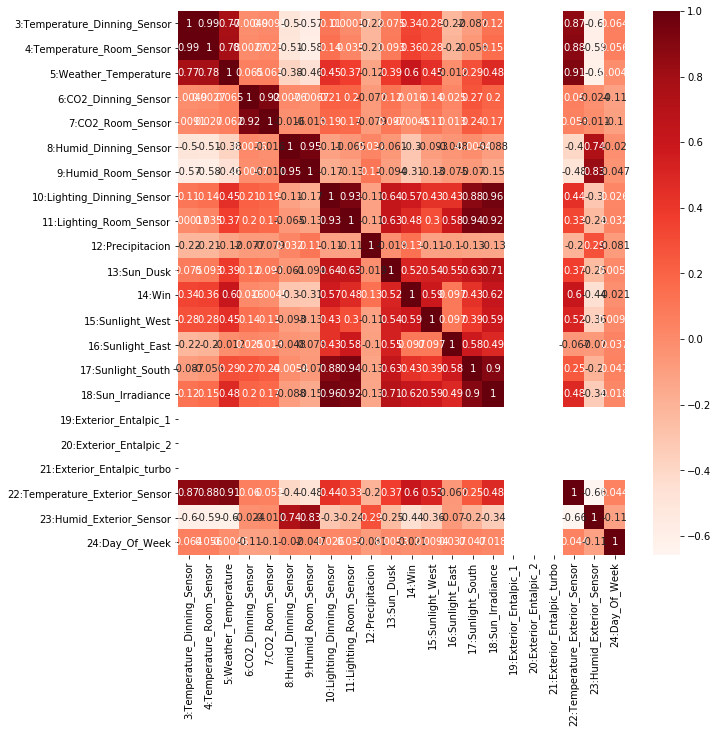

In [6]:
#Pearson Correaltion HeatMap
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [7]:
#Correlation with output variable
cor_target = abs(cor["5:Weather_Temperature"])
print(cor_target)

3:Temperature_Dinning_Sensor      0.772240
4:Temperature_Room_Sensor         0.783311
5:Weather_Temperature             1.000000
6:CO2_Dinning_Sensor              0.065182
7:CO2_Room_Sensor                 0.061737
8:Humid_Dinning_Sensor            0.381388
9:Humid_Room_Sensor               0.457232
10:Lighting_Dinning_Sensor        0.445576
11:Lighting_Room_Sensor           0.368208
12:Precipitacion                  0.120134
13:Sun_Dusk                       0.389228
14:Win                            0.600489
15:Sunlight_West                  0.446112
16:Sunlight_East                  0.012035
17:Sunlight_South                 0.289022
18:Sun_Irradiance                 0.482812
19:Exterior_Entalpic_1                 NaN
20:Exterior_Entalpic_2                 NaN
21:Exterior_Entalpic_turbo             NaN
22:Temperature_Exterior_Sensor    0.913790
23:Humid_Exterior_Sensor          0.600642
24:Day_Of_Week                    0.004574
Name: 5:Weather_Temperature, dtype: float64


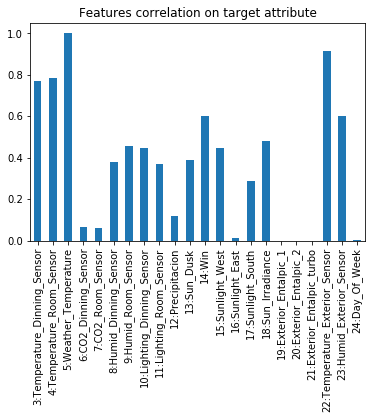

In [8]:
plt.title("Features correlation on target attribute")
cor_target.plot(kind='bar')

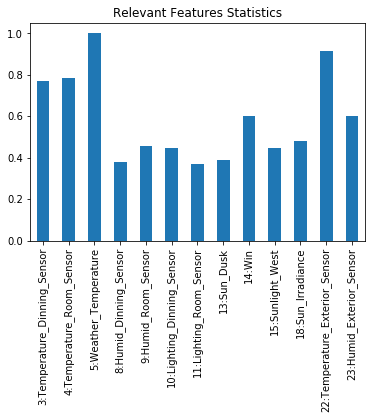

In [9]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features
plt.title("Relevant Features Statistics")
relevant_features.plot(kind='bar')

In [10]:
target = df['5:Weather_Temperature']
x = df.drop(['1:Date','2:Time','6:CO2_Dinning_Sensor','7:CO2_Room_Sensor','12:Precipitacion','15:Sunlight_West',
             '16:Sunlight_East','19:Exterior_Entalpic_1','20:Exterior_Entalpic_2','21:Exterior_Entalpic_turbo','24:Day_Of_Week'], axis=1)
#After this we are reduced to x 14 columns and y to one


In [11]:
#Normalization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)#Normalising data
data_trans = scaler.transform(x)#Filling in the dataframe
final_df= pd.DataFrame(data_trans,columns=x.columns)#constructing a data frame
final_df

,3:Temperature_Dinning_Sensor,4:Temperature_Room_Sensor,5:Weather_Temperature,8:Humid_Dinning_Sensor,9:Humid_Room_Sensor,10:Lighting_Dinning_Sensor,11:Lighting_Room_Sensor,13:Sun_Dusk,14:Win,17:Sunlight_South,18:Sun_Irradiance,22:Temperature_Exterior_Sensor,23:Humid_Exterior_Sensor
0,-0.088634,-0.104528,-0.478343,-1.498348,-1.734006,-0.671706,-0.661437,-1.098425,-1.066147,-0.673330,-0.753221,-0.454949,-1.049018
1,-0.100924,-0.116610,-0.478343,-1.492249,-1.745903,-0.679338,-0.647351,-1.098425,-1.066147,-0.673330,-0.752223,-0.461951,-1.057308
2,-0.126681,-0.147420,-0.478343,-1.488548,-1.731921,-0.675522,-0.642781,-1.098425,-0.994232,-0.673330,-0.752722,-0.467552,-1.058885
3,-0.155881,-0.169984,-0.478343,-1.481895,-1.722435,-0.669187,-0.640496,-1.098425,-0.962089,-0.673330,-0.752931,-0.484659,-1.049314
4,-0.181245,-0.195146,-0.478343,-1.471915,-1.707007,-0.676819,-0.636677,-1.098425,-1.066147,-0.673330,-0.752472,-0.503330,-0.977860
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,0.198832,0.203181,-0.478343,-0.149404,-0.344494,-0.682504,-0.690077,0.188877,-1.005128,-0.673330,-0.754226,-0.327053,-0.292805
4133,0.165405,0.168927,-0.676453,-0.148669,-0.340637,-0.673003,-0.540303,0.913128,-1.066147,-0.655586,-0.730905,-0.377628,-0.237932
4134,0.133216,0.131895,-0.706922,-0.146452,-0.336141,-0.367254,-0.448215,0.915371,-0.812267,-0.559822,-0.657358,-0.410442,-0.236348
4135,0.109451,0.112955,-0.706922,-0.149778,-0.329704,-0.310925,-0.443583,0.920626,-0.821530,-0.432217,-0.528944,-0.416043,-0.252537


AxesSubplot(0.125,0.125;0.775x0.755)


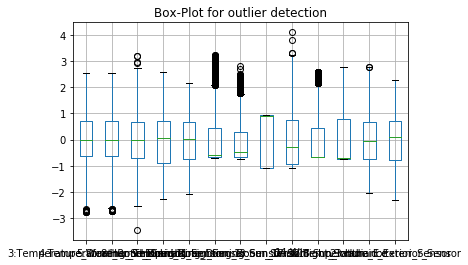

In [12]:
plt.title('Box-Plot for outlier detection')
#plt.ylim(-1,1)
#plt.xlim(-3,15)
print (final_df.boxplot())

AxesSubplot(0.125,0.125;0.775x0.755)


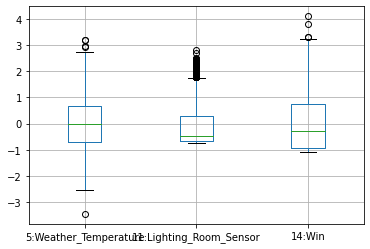

In [15]:
outlier_df=final_df[['5:Weather_Temperature','11:Lighting_Room_Sensor','14:Win']]
print (outlier_df.boxplot())

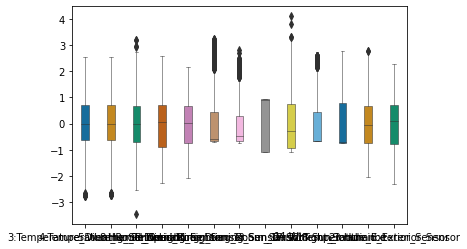

In [16]:
bplot = sns.boxplot(data=final_df, 
                 width=0.3,
                 palette="colorblind",linewidth=0.5)